# 9. Neural Networks with MNIST

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torch.nn.init
from torch.autograd import Variable

import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 9.1 Preparing MNIST Data

In [3]:
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [4]:
mnist_train.train_data.size(), mnist_test.test_data.size()

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

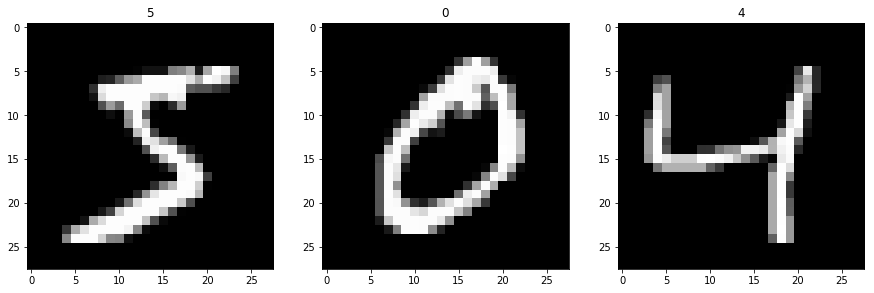

In [5]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title(mnist_train.train_labels[0])
ax1.imshow(mnist_train.train_data[0,:,:].numpy(), cmap='gray')

ax2.set_title(mnist_train.train_labels[1])
ax2.imshow(mnist_train.train_data[1,:,:].numpy(), cmap='gray')

ax3.set_title(mnist_train.train_labels[2])
ax3.imshow(mnist_train.train_data[2,:,:].numpy(), cmap='gray')

## 9.2 Batch Training

In [6]:
batch_size = 100

data_loader  = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=1)

# dataset (Dataset) – dataset from which to load the data.
# batch_size (int, optional) – how many samples per batch to load (default: 1).
# shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).
# num_workers (int, optional) – how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process. (default: 0)

In [7]:
for i in range(3) :
    batch_images, batch_labels = next(iter(data_loader))
    print(batch_labels.numpy(), ", ", len(batch_labels.numpy()))

[6 1 4 8 1 6 6 7 9 2 3 7 9 5 4 9 4 8 0 8 6 2 6 4 1 0 6 6 0 3 0 4 9 7 5 7 2
 2 0 5 5 5 1 6 1 9 0 5 1 9 6 0 9 9 6 8 6 3 1 2 9 0 6 9 3 9 5 6 5 1 7 8 5 7
 3 2 6 4 4 0 6 0 0 7 9 7 4 4 1 0 9 4 6 8 5 2 0 4 7 2] ,  100
[4 2 3 9 5 0 7 0 3 9 5 5 9 4 7 0 4 4 7 2 6 9 9 3 4 8 2 6 4 6 0 6 3 6 2 4 0
 4 0 7 7 7 7 2 5 9 6 5 9 1 7 5 8 1 2 0 3 1 1 5 8 2 6 6 9 0 3 6 6 4 7 6 3 1
 2 8 4 8 3 8 1 9 8 7 0 3 2 7 9 7 6 3 4 3 7 3 5 5 7 7] ,  100
[7 0 2 8 4 5 4 8 2 0 3 1 7 5 3 4 2 5 5 7 1 3 0 7 6 4 2 3 8 5 5 2 5 2 8 5 3
 9 3 3 4 2 1 1 2 1 2 7 1 0 1 5 9 1 6 0 8 4 5 3 0 1 1 1 8 1 9 8 1 8 4 8 1 9
 9 4 1 8 1 0 7 3 6 6 4 9 5 4 7 6 4 2 8 7 5 4 4 3 9 8] ,  100


## 9.3 Define Model

In [8]:
linear1 = torch.nn.Linear(784, 512, bias = True)
relu = torch.nn.ReLU()
linear2 = torch.nn.Linear(512, 10, bias = True)

model = torch.nn.Sequential(linear1, relu, linear2)

In [9]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# def cross_entropy(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True):

# Args:
#     input: Variable :math:`(N, C)` where `C = number of classes`
#     target: Variable :math:`(N)` where each value is
#         `0 <= targets[i] <= C-1`
#     weight (Tensor, optional): a manual rescaling weight given to each

In [10]:
num_epochs = 5

In [11]:
for epoch in range(num_epochs):
    
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(data_loader):
        
        X = Variable(batch_images.view(-1, 28 * 28))
        Y = Variable(batch_labels)
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d] Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.data[0]))
    
print("Learning Finished!")

Epoch [1/5], lter [100/600] Loss: 2.2857
Epoch [1/5], lter [200/600] Loss: 2.2734
Epoch [1/5], lter [300/600] Loss: 2.2424
Epoch [1/5], lter [400/600] Loss: 2.2158
Epoch [1/5], lter [500/600] Loss: 2.1888
Epoch [1/5], lter [600/600] Loss: 2.1700
Epoch [2/5], lter [100/600] Loss: 2.1514
Epoch [2/5], lter [200/600] Loss: 2.1191
Epoch [2/5], lter [300/600] Loss: 2.0903
Epoch [2/5], lter [400/600] Loss: 2.0700
Epoch [2/5], lter [500/600] Loss: 2.0323
Epoch [2/5], lter [600/600] Loss: 2.0253
Epoch [3/5], lter [100/600] Loss: 1.9775
Epoch [3/5], lter [200/600] Loss: 1.9706
Epoch [3/5], lter [300/600] Loss: 1.9248
Epoch [3/5], lter [400/600] Loss: 1.9270
Epoch [3/5], lter [500/600] Loss: 1.8531
Epoch [3/5], lter [600/600] Loss: 1.8611
Epoch [4/5], lter [100/600] Loss: 1.7683
Epoch [4/5], lter [200/600] Loss: 1.7521
Epoch [4/5], lter [300/600] Loss: 1.7594
Epoch [4/5], lter [400/600] Loss: 1.7312
Epoch [4/5], lter [500/600] Loss: 1.6057
Epoch [4/5], lter [600/600] Loss: 1.6487
Epoch [5/5], lte

## 9.4 Test Model

In [12]:
model.eval()

correct = 0
total = 0

for images, labels in mnist_test:
    
    images  = Variable(images.view(-1, 28 * 28))
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * correct / total))

Accuracy of test images: 78.120000 %


In [13]:
r = random.randint(0, len(mnist_test)-1)
X_single_data = Variable(mnist_test.test_data[r:r + 1].view(-1,28*28).float())
Y_single_data = Variable(mnist_test.test_labels[r:r + 1])

Label :  [4]
Prediction :  [4]


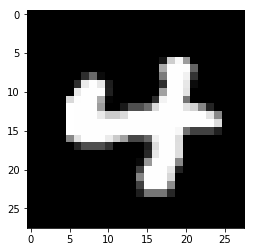

In [14]:
single_pre = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_pre.data, 1)[1].numpy())

## 9.5 Black Box

Prediction :  [0]


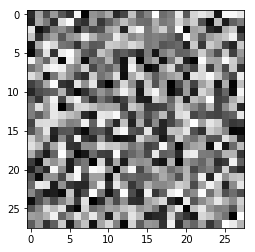

In [15]:
blackbox = Variable(torch.rand(X_single_data.size()))
blackbox_pre = model(blackbox)

plt.imshow(blackbox.data.view(28,28).numpy(), cmap='gray')

print('Prediction : ', torch.max(blackbox_pre.data, 1)[1].numpy())